#List of practical predictive machine learning applications

| **Application**                                 | **Input Variables**                                                                                                                                                                                                                                    | **Output**                                                                                                                  | **Description**                                                                               |
| ----------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | --------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------- |
| **Device Maintenance (Predictive Maintenance)** | - Device usage history<br>- Environmental conditions (e.g., temperature, humidity)<br>- Sensor data (e.g., vibration, temperature, pressure)<br>- Maintenance history<br>- Performance metrics<br>- Operational hours<br>- Manufacturer specifications | - Predicted time for next maintenance<br>- Probability of failure<br>- Recommended action (repair, replacement, adjustment) | Predict when a device will require maintenance to prevent downtime or failure.                |
| **Demand Forecasting (Retail)**                 | - Historical sales data<br>- Seasonal trends<br>- Promotions data<br>- Weather data<br>- Economic indicators<br>- Store foot traffic                                                                                                                   | - Predicted sales for each product<br>- Inventory replenishment needs<br>- Demand spikes                                    | Predict future product demand to optimize inventory levels and supply chain.                  |
| **Credit Scoring (Finance)**                    | - Credit history<br>- Income level<br>- Loan repayment history<br>- Employment status<br>- Debt-to-income ratio<br>- Age<br>- Location                                                                                                                 | - Credit score<br>- Likelihood of loan approval<br>- Risk assessment                                                        | Assess the creditworthiness of a borrower and predict the likelihood of default.              |
| **Churn Prediction (Customer Retention)**       | - Customer purchase history<br>- Customer support interactions<br>- Usage frequency<br>- Subscription plans<br>- Customer demographics<br>- Customer satisfaction scores                                                                               | - Probability of customer churn<br>- Customer lifetime value<br>- Retention strategies                                      | Predict whether a customer is likely to leave a service or subscription.                      |
| **Predictive Health Diagnosis**                 | - Patient's medical history<br>- Genetic information<br>- Lifestyle data (e.g., diet, exercise)<br>- Symptoms<br>- Test results (e.g., blood pressure, cholesterol)                                                                                    | - Risk of disease (e.g., heart disease, diabetes)<br>- Likely diagnosis<br>- Suggested treatments                           | Predict a patient's likelihood of developing a disease and suggest preventive measures.       |
| **Energy Consumption Forecasting**              | - Historical energy consumption data<br>- Weather conditions<br>- Building occupancy<br>- Device usage<br>- Time of day/week/month                                                                                                                     | - Predicted energy consumption<br>- Peak demand periods<br>- Cost-saving opportunities                                      | Predict future energy usage to optimize energy efficiency and reduce costs.                   |
| **Fraud Detection (Finance/Banking)**           | - Transaction history<br>- User location and device<br>- Spending patterns<br>- Account type<br>- Payment method<br>- IP address                                                                                                                       | - Probability of fraudulent transaction<br>- Anomaly detection<br>- Alert for suspicious activity                           | Identify and predict fraudulent transactions or activities to protect users and institutions. |
| **Recommendation Systems (E-Commerce/Media)**   | - User purchase history<br>- User preferences<br>- Product ratings<br>- Browsing history<br>- Demographics<br>- Social media data                                                                                                                      | - Recommended products or services<br>- Personalized content suggestions                                                    | Predict and recommend products or content to users based on their preferences and behavior.   |
| **Supply Chain Optimization**                   | - Historical sales data<br>- Production capacity<br>- Lead times<br>- Supplier performance<br>- Transportation data<br>- Stock levels                                                                                                                  | - Optimal order quantities<br>- Inventory replenishment schedule<br>- Transportation optimization                           | Predict the optimal stock levels and reorder times to streamline the supply chain.            |
| **Predictive Traffic Management**               | - Traffic volume data<br>- Weather conditions<br>- Time of day<br>- Roadwork and accidents data<br>- Historical traffic patterns                                                                                                                       | - Predicted traffic flow<br>- Optimal routes for drivers<br>- Traffic congestion hotspots                                   | Predict traffic conditions to optimize routes and reduce congestion.                          |
| **Employee Attrition Prediction**               | - Employee tenure<br>- Job satisfaction surveys<br>- Salary information<br>- Performance reviews<br>- Work-life balance indicators<br>- Promotion history                                                                                              | - Likelihood of employee leaving the company<br>- Suggested retention strategies                                            | Predict when an employee is likely to leave and suggest actions to retain them.               |
| **Product Quality Prediction (Manufacturing)**  | - Production process data<br>- Raw material quality<br>- Sensor data (temperature, pressure)<br>- Environmental factors<br>- Historical defect rates                                                                                                   | - Probability of product defects<br>- Recommended adjustments to the process<br>- Quality control actions                   | Predict product defects or quality issues in manufacturing processes to reduce waste.         |


In [12]:
!pip install Prophet==1.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 37.6 MB/s eta 0:00:00
  Attempting uninstall: Prophet
    Found existing installation: prophet 1.1.7
    Uninstalling prophet-1.1.7:
      Successfully uninstalled prophet-1.1.7


XGBoost Model Accuracy: 0.9900


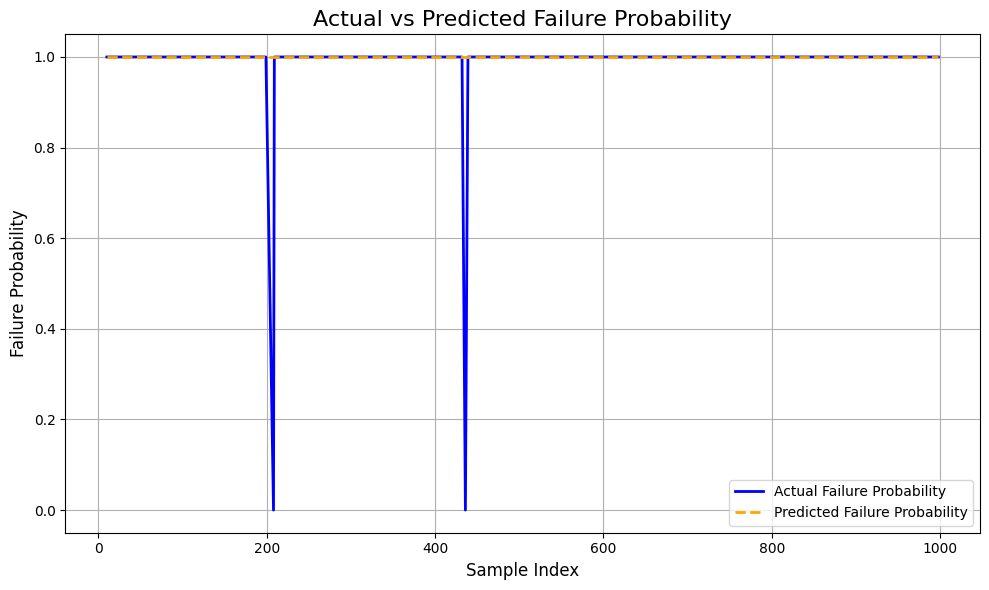

<Figure size 1000x600 with 0 Axes>

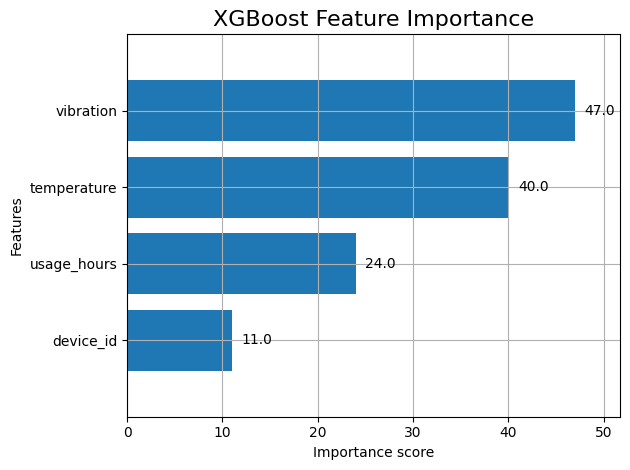

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from prophet import Prophet

# Set random seed for reproducibility
np.random.seed(42)

# Simulate some data for predictive maintenance (XGBoost)
n_samples = 1000
device_id = np.random.choice(range(1, 11), n_samples)  # 10 different devices

# Simulate features
usage_hours = np.random.normal(loc=1000, scale=500, size=n_samples)  # Device usage in hours
temperature = np.random.normal(loc=30, scale=5, size=n_samples)  # Device temperature
vibration = np.random.normal(loc=5, scale=1.5, size=n_samples)  # Vibration level (higher means more likely to fail)
maintenance_history = np.random.choice([0, 1], size=n_samples, p=[0.85, 0.15])  # 15% maintenance history

# Failure probability (binary target)
failure_probability = (usage_hours * 0.0001 + vibration * 0.1 + temperature * 0.02 + maintenance_history * 0.5 > 0.75).astype(int)

# Create a DataFrame
df = pd.DataFrame({
    'device_id': device_id,
    'usage_hours': usage_hours,
    'temperature': temperature,
    'vibration': vibration,
    'maintenance_history': maintenance_history,
    'failure_probability': failure_probability
})

# Split data into features (X) and target (y)
X = df.drop(columns=['failure_probability'])
y = df['failure_probability']

# Train-test split for XGBoost
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Model
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Model Accuracy: {accuracy:.4f}")

# Plotting: Create similar visualizations as Prophet

# Prepare data for plotting actual vs predicted
test_data = X_test.copy()
test_data['actual'] = y_test
test_data['predicted'] = y_pred
test_data = test_data.sort_index()  # Sort by index for proper plotting order

# Plot actual vs predicted failure probability
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['actual'], label='Actual Failure Probability', color='blue', linestyle='-', linewidth=2)
plt.plot(test_data.index, test_data['predicted'], label='Predicted Failure Probability', color='orange', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Failure Probability', fontsize=16)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Failure Probability', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Importance Plot (XGBoost)
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, importance_type='weight', max_num_features=10, height=0.8)
plt.title('XGBoost Feature Importance', fontsize=16)
plt.tight_layout()
plt.show()


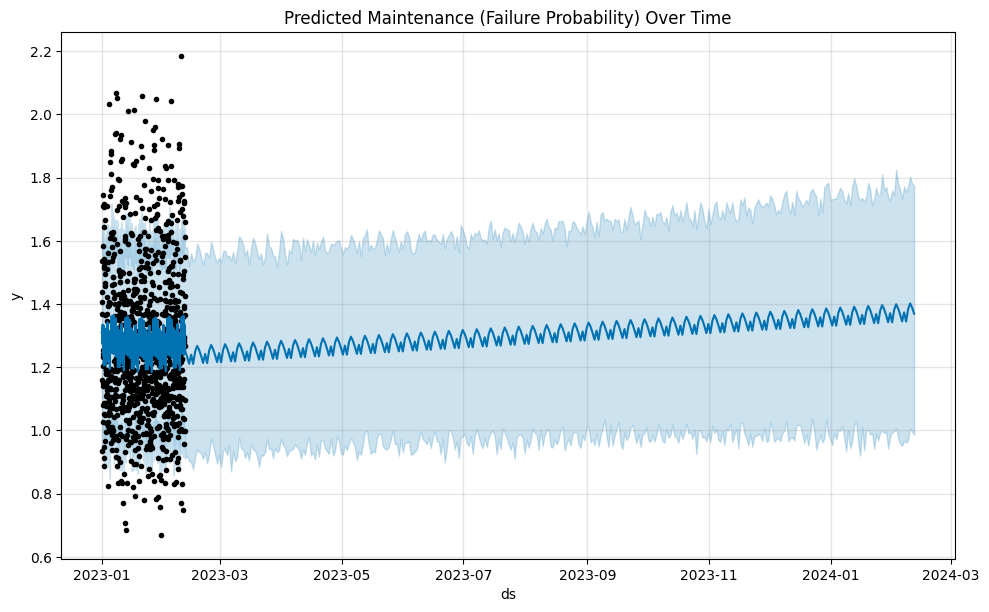

Prediction Accuracy: 1.0000


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from prophet import Prophet

# Simulate some time-based data
n_samples = 1000
device_id = np.random.choice(range(1, 11), n_samples)  # 10 different devices

# Simulate features
usage_hours = np.random.normal(loc=1000, scale=500, size=n_samples)  # Device usage in hours
temperature = np.random.normal(loc=30, scale=5, size=n_samples)  # Device temperature
vibration = np.random.normal(loc=5, scale=1.5, size=n_samples)  # Vibration level (higher means more likely to fail)
maintenance_history = np.random.choice([0, 1], size=n_samples, p=[0.85, 0.15])  # 15% maintenance history

# Failure probability (continuous target, no threshold)
failure_probability = (
    usage_hours * 0.0001 + vibration * 0.1 + temperature * 0.02 + maintenance_history * 0.5
)

# Create a DataFrame
df = pd.DataFrame({
    'device_id': device_id,
    'usage_hours': usage_hours,
    'temperature': temperature,
    'vibration': vibration,
    'maintenance_history': maintenance_history,
    'failure_probability': failure_probability
})

# Create a datetime range for each observation
start_date = pd.to_datetime('2023-01-01')
df['ds'] = pd.date_range(start=start_date, periods=n_samples, freq='h')

# Aggregate failure probability by 'ds' (date), and rename the column to 'y' for Prophet
df_time_series = df.groupby('ds').agg(
    total_failure_probability=('failure_probability', 'mean')
).reset_index()

df_time_series = df_time_series.rename(columns={'total_failure_probability': 'y'})

# Initialize and fit the Prophet model
prophet_model = Prophet(daily_seasonality=True, yearly_seasonality=False)
prophet_model.fit(df_time_series)

# Make future dataframe: Predict for the next 365 days
future = prophet_model.make_future_dataframe(periods=365, freq='D')

# Forecast the maintenance requirement
forecast = prophet_model.predict(future)

# Plot the forecast
fig = prophet_model.plot(forecast)
plt.title("Predicted Maintenance (Failure Probability) Over Time")
plt.show()

# Now calculate the accuracy by converting failure_probability into binary classification
# Assume that if failure probability is above 0.5, it's considered a failure (1), otherwise no failure (0)
threshold = 0.5

# Create a binary target column based on the threshold (failure: 1, no failure: 0)
df_time_series['y_binary'] = (df_time_series['y'] > threshold).astype(int)

# Forecast the predicted binary failure probabilities using Prophet (use the forecast values)
forecast['predicted_binary'] = (forecast['yhat'] > threshold).astype(int)

# We need to match the predicted binary values with the actual binary values from the last 365 days of historical data
# Take the last 365 actual values from the time series
actual = df_time_series['y_binary'].iloc[-365:].values  # Last 365 actual values

# The predicted values will correspond to the forecasted 365 days
predicted = forecast['predicted_binary'].tail(365).values  # Predicted values for the next 365 days

# Calculate accuracy by comparing the actual binary values against the predicted binary values
accuracy = accuracy_score(actual, predicted)
print(f"Prediction Accuracy: {accuracy:.4f}")


##Now let's add a regressor and check the accuracy improvement
### The result is compared with XGboost

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:31:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Model Accuracy: 0.9900
Comparison Accuracy (Prophet vs XGBoost on test samples aligned by date): 1.0000
Prophet Model Accuracy (vs Actual Test Data): 0.9900


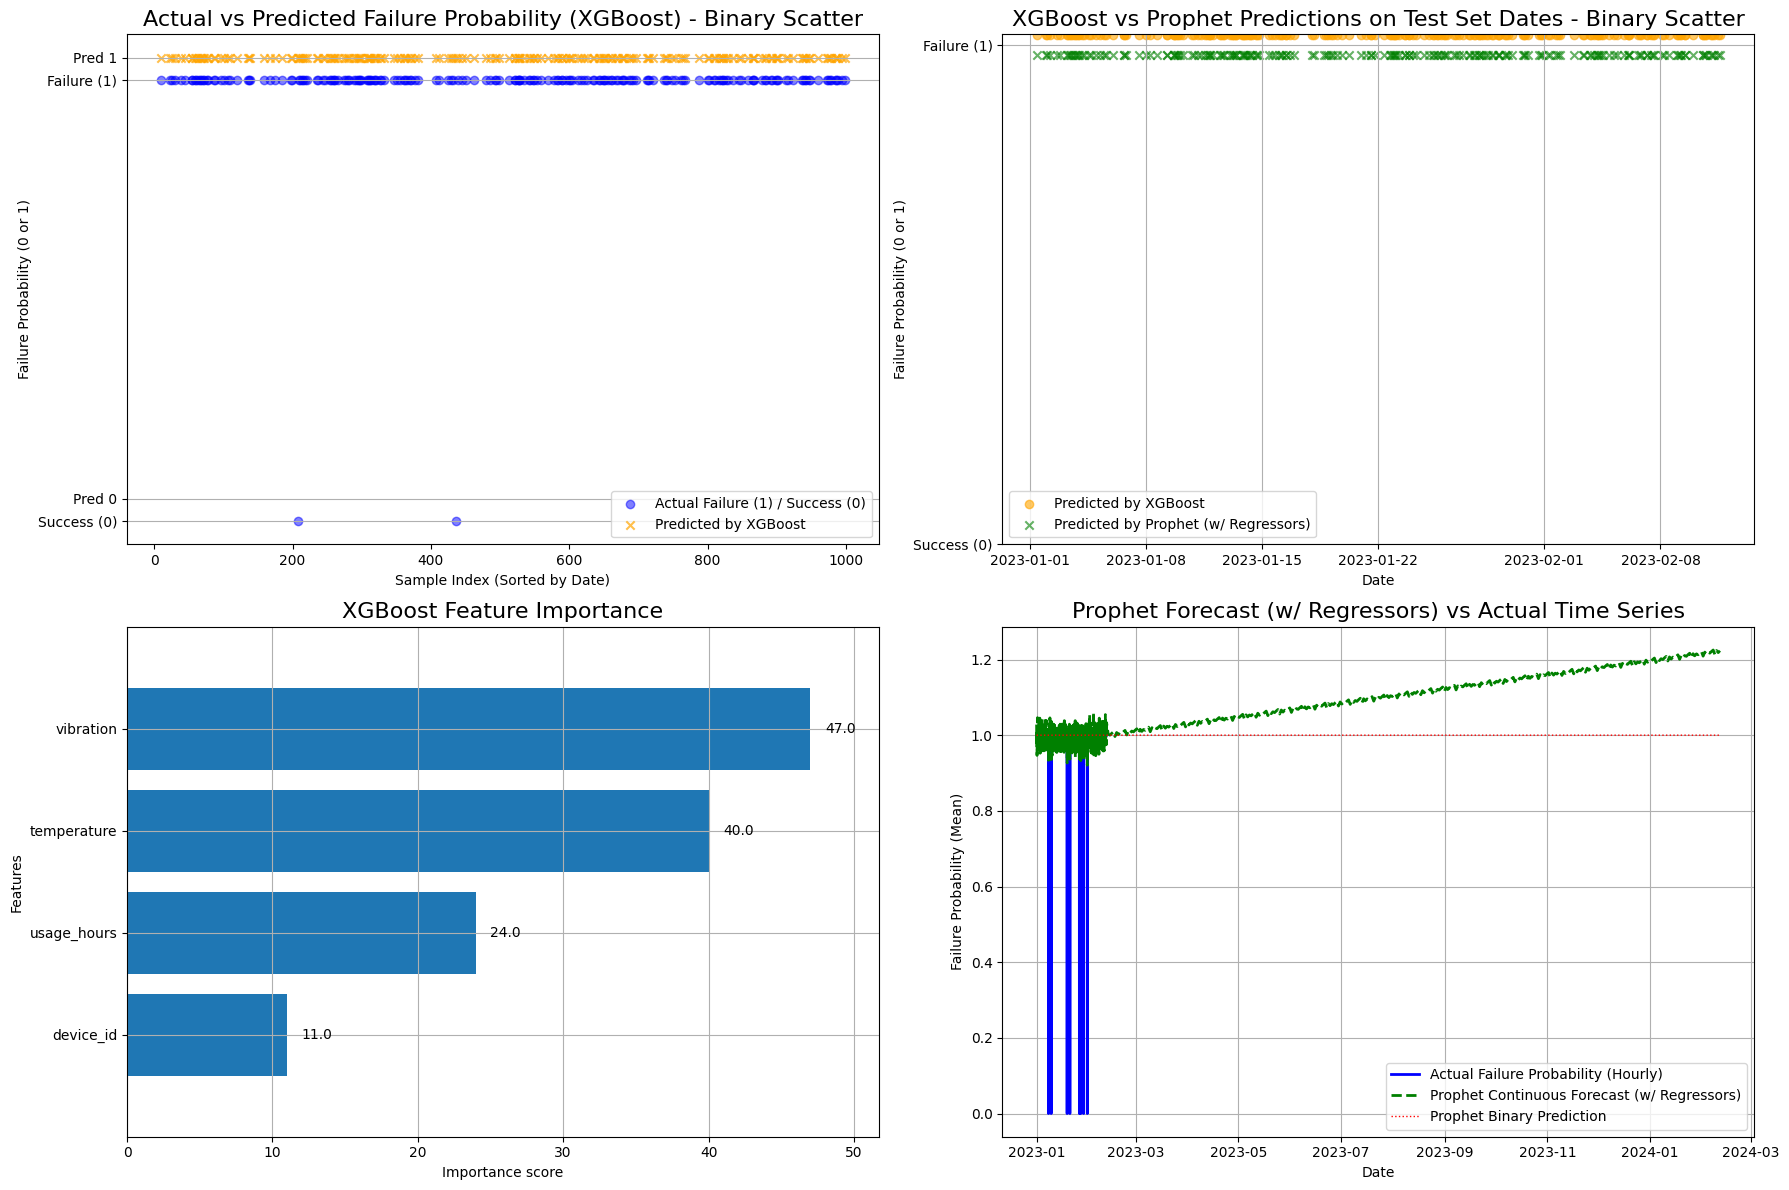

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from prophet import Prophet

# Set random seed for reproducibility
np.random.seed(42)

# Simulate some data for predictive maintenance (XGBoost)
n_samples = 1000
device_id = np.random.choice(range(1, 11), n_samples)  # 10 different devices

# Simulate features
usage_hours = np.random.normal(loc=1000, scale=500, size=n_samples)  # Device usage in hours
temperature = np.random.normal(loc=30, scale=5, size=n_samples)  # Device temperature
vibration = np.random.normal(loc=5, scale=1.5, size=n_samples)  # Vibration level
maintenance_history = np.random.choice([0, 1], size=n_samples, p=[0.85, 0.15])  # 15% maintenance history

# Failure probability (binary target) based on a simple linear combination and threshold
# This defines the "ground truth" for the simulation
failure_probability = (usage_hours * 0.0001 + vibration * 0.1 + temperature * 0.02 + maintenance_history * 0.5 > 0.75).astype(int)

# Create a DataFrame
df = pd.DataFrame({
    'device_id': device_id,
    'usage_hours': usage_hours,
    'temperature': temperature,
    'vibration': vibration,
    'maintenance_history': maintenance_history,
    'failure_probability': failure_probability
})

# Create a datetime range for each observation - Create 'ds' column here for Prophet model later
start_date = pd.to_datetime('2023-01-01')
df['ds'] = pd.date_range(start=start_date, periods=n_samples, freq='h')

# Split data into features (X) and target (y) for XGBoost
X = df.drop(columns=['failure_probability', 'ds'])
y = df['failure_probability']

# Train-test split for XGBoost
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Model Training and Prediction
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy: {accuracy_xgb:.4f}")


# --- PROPHET MODEL IMPROVEMENT: ADDING REGRESSORS ---

# Prepare data for Prophet (requires 'ds' and 'y')
prophet_df = df.rename(columns={'failure_probability': 'y'})

prophet_model = Prophet(daily_seasonality=True, yearly_seasonality=False)

# Define and add the features that drive failure as external regressors
REGRESSORS = ['usage_hours', 'temperature', 'vibration', 'maintenance_history']
for regressor in REGRESSORS:
    prophet_model.add_regressor(regressor)

# Fit Prophet model on the full historical data, including regressors
prophet_model.fit(prophet_df[['ds', 'y'] + REGRESSORS])

# Make future dataframe: Predict for the next 365 days
future = prophet_model.make_future_dataframe(periods=365, freq='D')

# --- Prepare Regressors for Future Prediction ---
# 1. Historical data (for in-sample prediction)
historical_features = prophet_df[['ds'] + REGRESSORS]

# 2. Future data (out-of-sample)
future_only = future[future['ds'] > historical_features['ds'].max()].copy()

# Calculate historical means for the regressors
mean_regressor_values = historical_features[REGRESSORS].mean()

# Fill the future features with their historical mean (simplification for unknown future)
for col in REGRESSORS:
    future_only[col] = mean_regressor_values[col]

# Combine historical data and future data for the final prediction DataFrame
forecast_df = pd.concat([historical_features, future_only], ignore_index=True)
forecast_df = forecast_df[forecast_df['ds'].isin(future['ds'])].copy()

# Perform the prediction
forecast = prophet_model.predict(forecast_df)

# Convert Prophet forecast to binary using threshold
threshold = 0.5
forecast['predicted_binary_prophet'] = (forecast['yhat'] > threshold).astype(int)

# --- CORRECT COMPARISON LOGIC (XGBoost vs Prophet) ---
# To compare the models accurately on the test set, we must align by date/time.

# 1. Get the dates corresponding to the XGBoost test set indices
test_dates = df.loc[y_test.index, 'ds']

# 2. Filter the Prophet forecast to only those dates and sort them chronologically
forecast_overlap = forecast[forecast['ds'].isin(test_dates)].sort_values(by='ds')
predicted_prophet_overlap = forecast_overlap['predicted_binary_prophet'].values

# 3. Align the XGBoost predictions to the same chronological order
y_test_sorted_by_date_df = df.loc[y_test.index].sort_values(by='ds')
X_test_sorted = y_test_sorted_by_date_df.drop(columns=['failure_probability', 'ds'])
y_pred_xgb_sorted = model.predict(X_test_sorted)
y_test_sorted = y_test_sorted_by_date_df['failure_probability']

# Recalculate comparison accuracy using the properly aligned subsets
accuracy_prophet_vs_xgb = accuracy_score(y_pred_xgb_sorted, predicted_prophet_overlap)
print(f"Comparison Accuracy (Prophet vs XGBoost on test samples aligned by date): {accuracy_prophet_vs_xgb:.4f}")

# Calculate Prophet's accuracy against the actual ground truth (y_test_sorted)
accuracy_prophet_vs_actual = accuracy_score(y_test_sorted, predicted_prophet_overlap)
print(f"Prophet Model Accuracy (vs Actual Test Data): {accuracy_prophet_vs_actual:.4f}")


# --- Visualization Improvements ---

plt.figure(figsize=(18, 12))

# 1. Actual vs Predicted Failure Probability (XGBoost) - SCATTER PLOT
plt.subplot(2, 2, 1)
plt.scatter(y_test_sorted.index, y_test_sorted, label='Actual Failure (1) / Success (0)', color='blue', alpha=0.5, marker='o')
plt.scatter(y_test_sorted.index, y_pred_xgb_sorted + 0.05, label='Predicted by XGBoost', color='orange', alpha=0.7, marker='x')

plt.title('Actual vs Predicted Failure Probability (XGBoost) - Binary Scatter', fontsize=16)
plt.xlabel('Sample Index (Sorted by Date)')
plt.ylabel('Failure Probability (0 or 1)')
plt.yticks([0, 1, 0.05, 1.05], ['Success (0)', 'Failure (1)', 'Pred 0', 'Pred 1'])
plt.legend()
plt.grid(axis='y')


# 2. Prophet predicted vs XGBoost predicted (aligned) - SCATTER PLOT
plt.subplot(2, 2, 2)
# Use the sorted dates for the x-axis
plt.scatter(forecast_overlap['ds'], y_pred_xgb_sorted + 0.02, label='Predicted by XGBoost', color='orange', marker='o', alpha=0.6)
plt.scatter(forecast_overlap['ds'], predicted_prophet_overlap - 0.02, label='Predicted by Prophet (w/ Regressors)', color='green', marker='x', alpha=0.6)

plt.title('XGBoost vs Prophet Predictions on Test Set Dates - Binary Scatter', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Failure Probability (0 or 1)')
plt.yticks([0, 1], ['Success (0)', 'Failure (1)'])
plt.legend()
plt.grid(True)


# 3. Feature Importance Plot (XGBoost) - REMAINS A BAR PLOT
plt.subplot(2, 2, 3)
xgb.plot_importance(model, importance_type='weight', max_num_features=10, height=0.8, ax=plt.gca())
plt.title('XGBoost Feature Importance', fontsize=16)


# 4. Prophet's Forecast (time series) vs Actual Data - LINE PLOT
plt.subplot(2, 2, 4)
# We use the full prophet_df for plotting the "actual" y
plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual Failure Probability (Hourly)', color='blue', linestyle='-', linewidth=2)
plt.plot(forecast['ds'], forecast['yhat'], label='Prophet Continuous Forecast (w/ Regressors)', color='green', linestyle='--', linewidth=2)
plt.plot(forecast['ds'], forecast['predicted_binary_prophet'], label='Prophet Binary Prediction', color='red', linestyle=':', linewidth=1)

plt.title('Prophet Forecast (w/ Regressors) vs Actual Time Series', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Failure Probability (Mean)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

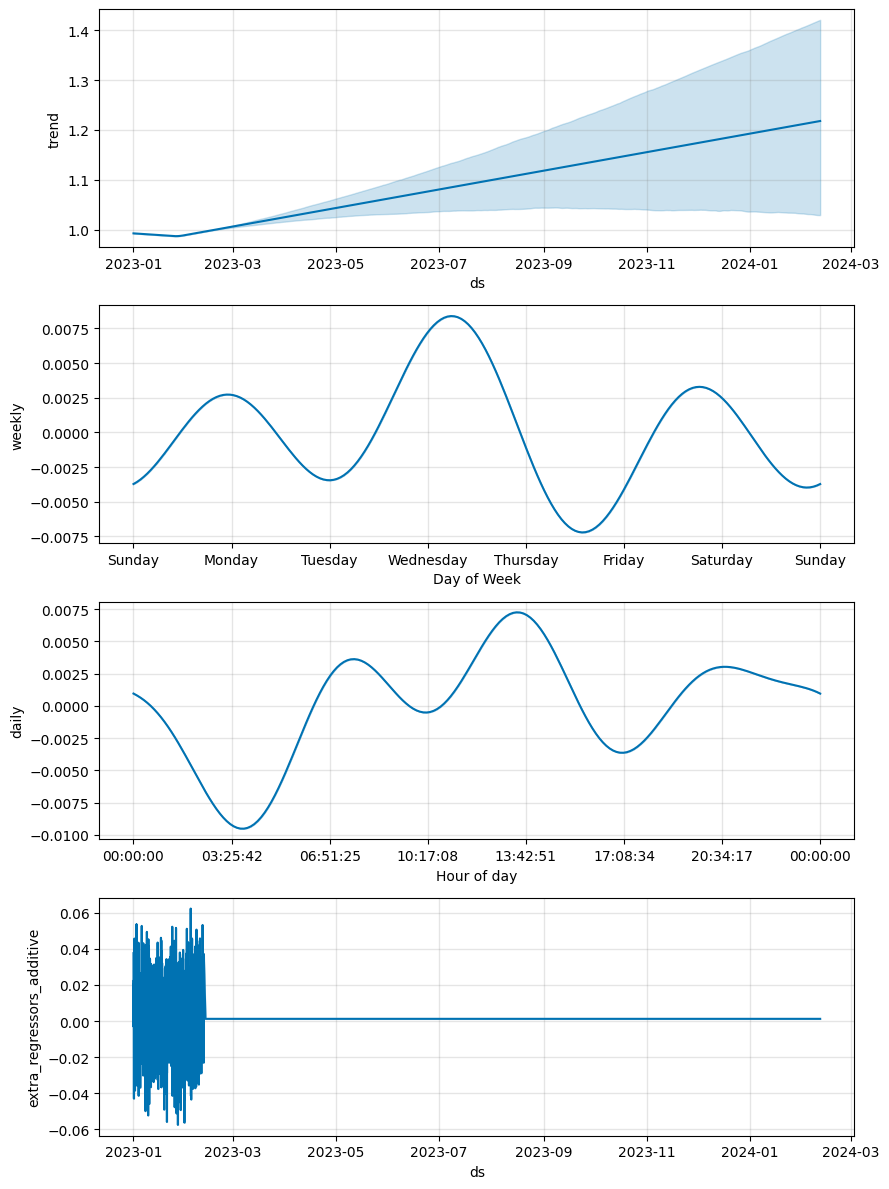

In [56]:
# Visualizing the effect of each regressor on the forecast
prophet_model.plot_components(forecast)
plt.show()


In [67]:
# Display the head of the 'df' DataFrame
display(df.head(3))

,device_id,usage_hours,temperature,vibration,maintenance_history,failure_probability,ds
0,7,1433.924518,38.163262,6.550888,0,1,2023-01-01 00:00:00
1,4,531.742991,28.695439,5.428017,0,1,2023-01-01 01:00:00
2,8,562.237487,34.722455,5.598475,1,1,2023-01-01 02:00:00


Permutation Importance for Prophet Model Regressors (based on MAE):
  temperature: -0.0003
  vibration: -0.0002
  usage_hours: -0.0000
  maintenance_history: -0.0000


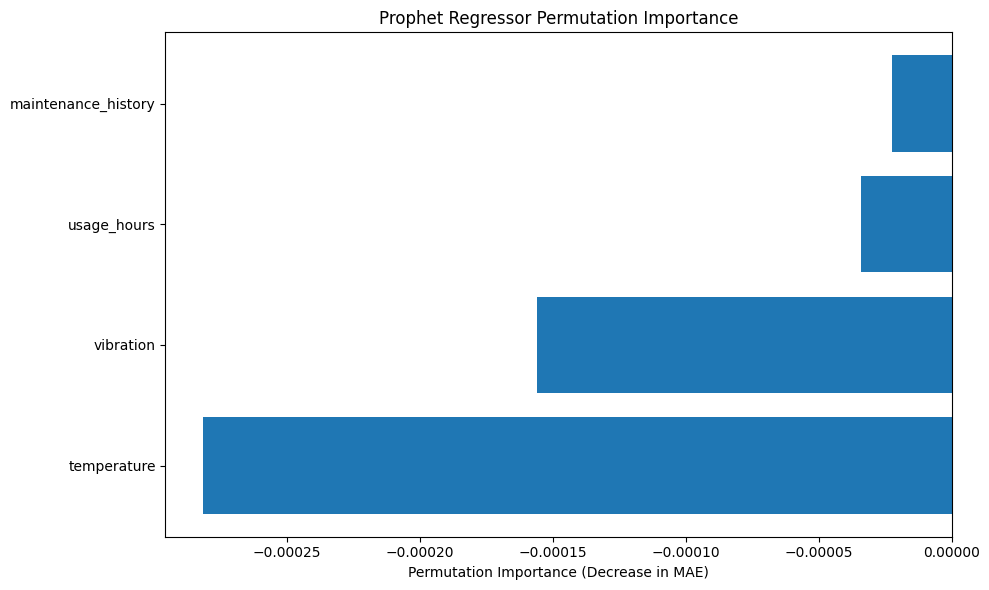

In [62]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error
import pandas as pd # Import pandas

# Use the original data that the Prophet model was fitted on (prophet_df)
# This dataframe contains both the regressors and the target variable 'y'
X_prophet = prophet_df[REGRESSORS]  # Features for permutation importance
y_prophet = prophet_df['y']          # Target for permutation importance

# Permutation importance (using sklearn's permutation_importance function)
# We need a 'scorer' function that takes the model predictions and actual values
# and returns a score. For regression (Prophet's yhat), MAE is a suitable metric.
# The permutation_importance function expects scorers to return higher values for better performance,
# so we will use the negative MAE as the scoring function.
def neg_mean_absolute_error_scorer(estimator, X, y):
    # Create a DataFrame with 'ds' and regressors for Prophet prediction
    # Use the index of X to get the corresponding 'ds' values from prophet_df
    predict_df = pd.DataFrame({'ds': prophet_df.loc[X.index, 'ds']})
    for regressor in REGRESSORS:
        predict_df[regressor] = X[regressor]

    y_pred = estimator.predict(predict_df)['yhat']
    return -mean_absolute_error(y, y_pred)


# Calculate permutation importance
# Use the prophet_model directly with the regressors and target from the training data
result = permutation_importance(
    prophet_model,
    X_prophet,
    y_prophet,
    scoring=neg_mean_absolute_error_scorer, # Use negative MAE as the scoring metric
    n_repeats=10,
    random_state=42,
    n_jobs=-1 # Use all available CPU cores
)

# Get the importance means and sort them
sorted_idx = result.importances_mean.argsort()
importance_means = result.importances_mean[sorted_idx]
regressor_names = np.array(REGRESSORS)[sorted_idx]

# Display the importance scores
print("Permutation Importance for Prophet Model Regressors (based on MAE):")
for regressor, score in zip(regressor_names, importance_means):
    print(f"  {regressor}: {score:.4f}")

# Plot the permutation importance
plt.figure(figsize=(10, 6))
plt.barh(regressor_names, importance_means)
plt.xlabel("Permutation Importance (Decrease in MAE)")
plt.title("Prophet Regressor Permutation Importance")
plt.tight_layout()
plt.show()

We also could use SelectFromModel

Selected features based on RandomForestRegressor importance: ['temperature' 'vibration']
usage_hours: 0.1396
temperature: 0.4727
vibration: 0.3840
maintenance_history: 0.0037


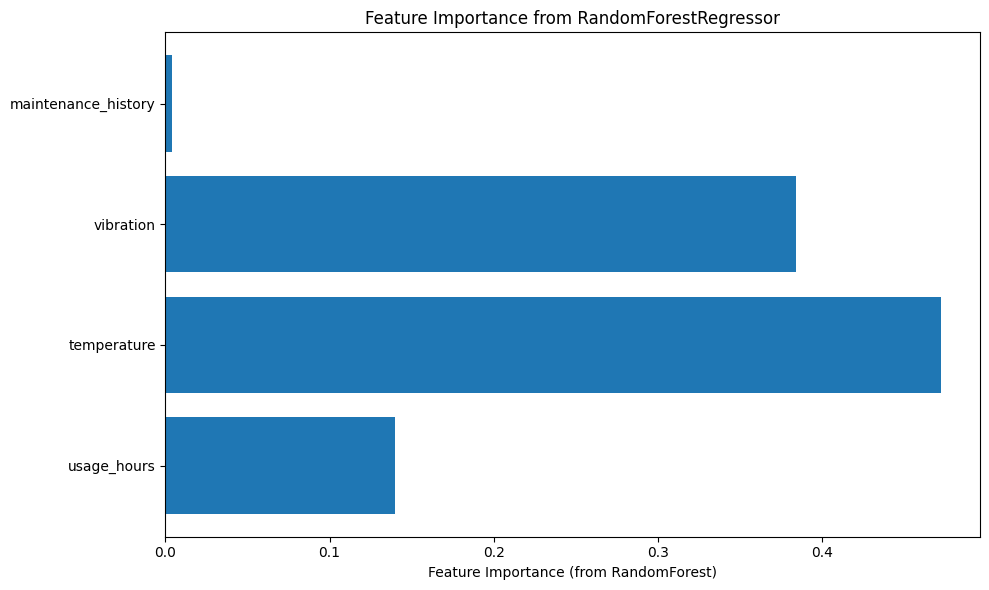

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error
import pandas as pd # Import pandas
import numpy as np
import matplotlib.pyplot as plt

# Use the original data that the Prophet model was fitted on (prophet_df)
# This dataframe contains both the regressors and the target variable 'y'
X_prophet = prophet_df[REGRESSORS]  # Features for feature selection
y_prophet = prophet_df['y']          # Target for feature selection

# Train a RandomForestRegressor (or any other model that supports feature importances)
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_model.fit(X_prophet, y_prophet)

# Use SelectFromModel to select features based on their importance
sfm = SelectFromModel(rf_model, threshold="mean", max_features=None, importance_getter="auto")
sfm.fit(X_prophet, y_prophet)

# Get the selected features based on importance
selected_features = np.array(REGRESSORS)[sfm.get_support()]
print(f"Selected features based on RandomForestRegressor importance: {selected_features}")

# Optionally, you can print the importance scores for each feature
feature_importances = rf_model.feature_importances_
for feature, importance in zip(REGRESSORS, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Plot the feature importances (Optional)
plt.figure(figsize=(10, 6))
plt.barh(REGRESSORS, feature_importances)
plt.xlabel("Feature Importance (from RandomForest)")
plt.title("Feature Importance from RandomForestRegressor")
plt.tight_layout()
plt.show()

# If you want to retrain Prophet with the selected features, you can use:
X_selected = X_prophet[selected_features]
# Then retrain Prophet with the selected regressors


In [75]:
prophet_df[:]

,device_id,usage_hours,temperature,vibration,maintenance_history,y,ds
0,7,1433.924518,38.163262,6.550888,0,1,2023-01-01 00:00:00
1,4,531.742991,28.695439,5.428017,0,1,2023-01-01 01:00:00
2,8,562.237487,34.722455,5.598475,1,1,2023-01-01 02:00:00
3,5,1102.305105,26.553855,5.983406,0,1,2023-01-01 03:00:00
4,7,698.676097,28.487666,5.568921,0,1,2023-01-01 04:00:00
...,...,...,...,...,...,...,...
995,10,782.397836,21.498951,6.576776,0,1,2023-02-11 11:00:00
996,10,452.327218,25.974713,4.174793,0,1,2023-02-11 12:00:00
997,8,891.134508,37.527078,5.613274,0,1,2023-02-11 13:00:00
998,2,437.853703,23.723319,6.856587,1,1,2023-02-11 14:00:00


In [73]:
prophet_df[['ds', 'y'] + [regressor]]

,ds,y,maintenance_history
0,2023-01-01 00:00:00,1,0
1,2023-01-01 01:00:00,1,0
2,2023-01-01 02:00:00,1,1
3,2023-01-01 03:00:00,1,0
4,2023-01-01 04:00:00,1,0
...,...,...,...
995,2023-02-11 11:00:00,1,0
996,2023-02-11 12:00:00,1,0
997,2023-02-11 13:00:00,1,0
998,2023-02-11 14:00:00,1,1


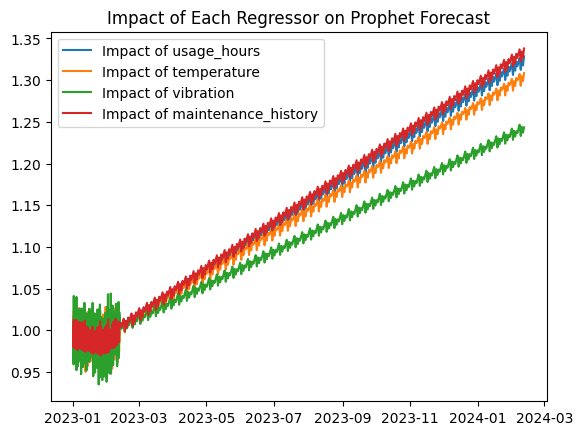

In [61]:
# For each regressor, fit the model with just that regressor and check the impact
for regressor in REGRESSORS:
    model_copy = Prophet(daily_seasonality=True, yearly_seasonality=False)
    model_copy.add_regressor(regressor)
    model_copy.fit(prophet_df[['ds', 'y'] + [regressor]])
    forecast_copy = model_copy.predict(forecast_df)
    plt.plot(forecast_copy['ds'], forecast_copy['yhat'], label=f'Impact of {regressor}')

plt.legend()
plt.title('Impact of Each Regressor on Prophet Forecast')
plt.show()


##Sigma observation shows how confident our model is

In [68]:
sigma_obs_value = prophet_model.params['sigma_obs']
print(sigma_obs_value)

[[0.08630104]]


##Lower value of sigma observation shows the model is more confident